In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
hourly = pd.read_csv("FremontBridge.csv",parse_dates=True,index_col="Date")

In [6]:
hourly.sample(n =10)

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2016-11-09 17:00:00,110.0,361.0
2013-12-05 10:00:00,45.0,39.0
2017-01-17 18:00:00,48.0,143.0
2016-05-17 05:00:00,42.0,14.0
2014-06-07 21:00:00,33.0,49.0
2013-11-26 01:00:00,2.0,3.0
2016-10-25 17:00:00,149.0,421.0
2012-11-16 11:00:00,47.0,26.0
2014-02-05 19:00:00,43.0,66.0


In [7]:
hourly.columns = {'northBound','southbound'}

In [8]:
hourly.head()

,northBound,southbound
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [9]:
hourly["total"] = hourly.northBound+hourly.southbound

In [12]:
daily = hourly.resample("d").sum()#每天的加在一起

In [13]:
weekly = daily.resample("w").sum()

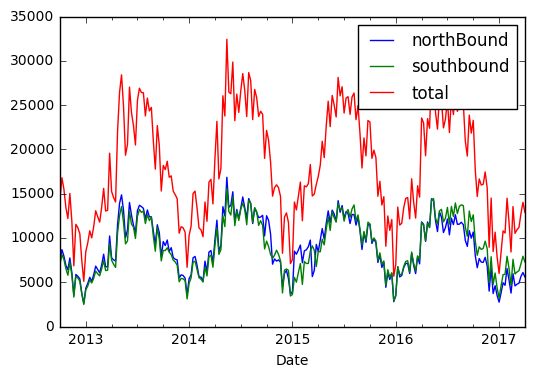

In [16]:
weekly.plot()

In [17]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date
       date：  exmple:2012-10-07
       axis:   地区的经度
       latitude: 地区的纬度
return :how many hours a day
    """
    diff = date - pd.datetime(2000, 12, 21)
    day = diff.total_seconds() / 24. / 3600
    day %= 365.25
    m = 1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(day * np.pi / 182.625))
    m = max(0, min(m, 2))
    return 24. * np.degrees(np.arccos(1 - m)) / 180.

In [18]:
daily["day_of_hours"] = daily.index.map(hours_of_daylight)

In [20]:
weekly["day_of_hours"] = weekly.index.map(hours_of_daylight)

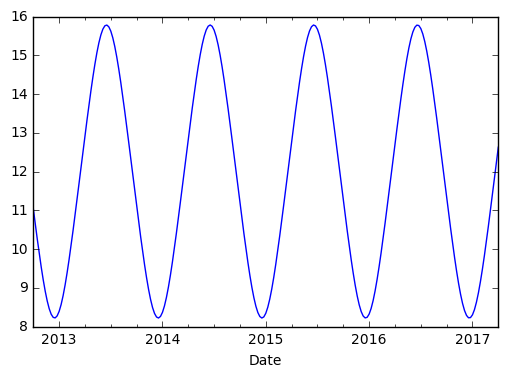

In [22]:
weekly.day_of_hours.plot()

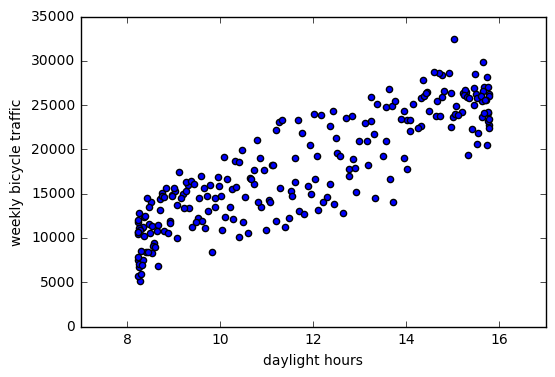

In [23]:
plt.scatter(weekly.day_of_hours,weekly.total)
plt.xlabel('daylight hours')
plt.ylabel('weekly bicycle traffic')

In [36]:
from sklearn.linear_model import LinearRegression
X = weekly[['day_of_hours']]
y = weekly[['total']]

In [37]:
clf = LinearRegression(fit_intercept = True).fit(X,y)

In [39]:
print clf.coef_
print clf.score(X,y)

[[ 2066.34070636]]
0.756414857206


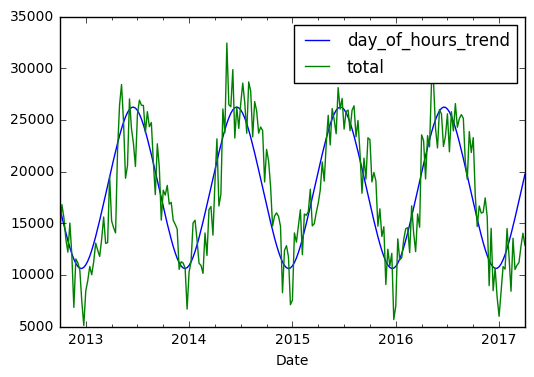

In [41]:
weekly["day_of_hours_trend"] = clf.predict(X)
weekly[["day_of_hours_trend","total"]].plot()

In [42]:
days = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
def get_day_of_week(index):
    return days[index.dayofweek]

In [43]:
daily["day_of_week"]=daily.index.map(get_day_of_week)

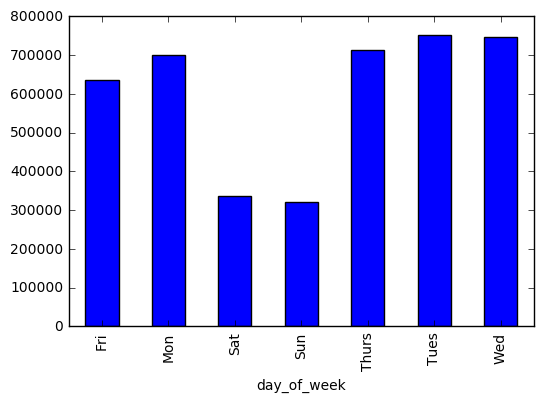

In [45]:
day_count = daily.groupby("day_of_week").total.sum().plot(kind = 'bar')

In [47]:
weather = pd.read_csv("FremontWeather.csv",index_col = "DATE",parse_dates = True)

In [48]:
weather = weather['20121003':'20170331']

,PRCP,TMAX,TMIN
DATE,,,
2012-10-01,0.00,74,48
2012-10-02,0.00,64,50
2012-10-03,0.00,66,46
2012-10-04,0.00,66,47
2012-10-05,0.00,71,48
2012-10-06,0.00,75,46
2012-10-07,0.00,75,46
2012-10-08,0.00,70,46
2012-10-09,0.00,61,48


In [49]:
weather['TMIN'] = 0.18*weather['TMIN'] +32

In [50]:
weather['TMAX'] = 0.18*weather['TMAX'] + 32

In [51]:
weather['PRCP']/=254

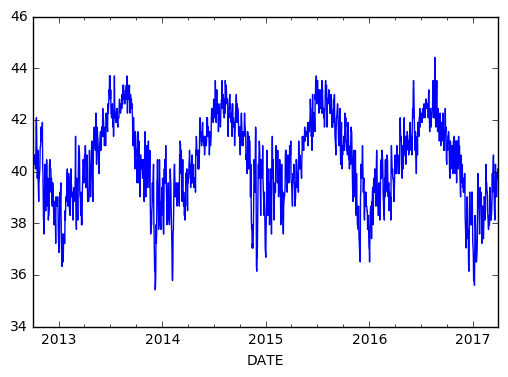

In [73]:
weather.TMIN.plot()

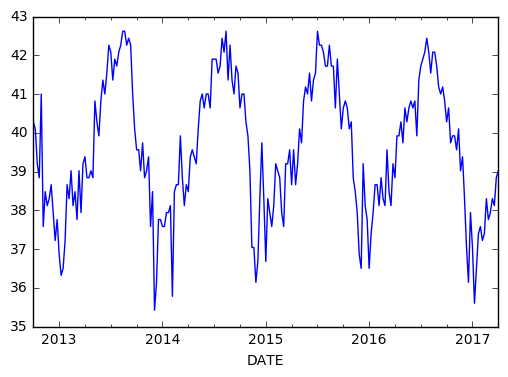

In [75]:
weather.TMIN.resample('w').min().plot()

In [78]:
daily_1 = daily
for i in range(7):
    daily_1[days[i]] = (daily_1.index.dayofweek == i).astype(float)
daily_1.head(10)

,northBound,southbound,total,day_of_hours,day_of_week,Mon,Tues,Wed,Thurs,Fri,Sat,Sun
Date,,,,,,,,,,,,
2012-10-03,1760.0,1761.0,3521.0,11.277359,Wed,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,1708.0,1767.0,3475.0,11.219142,Thurs,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,1558.0,1590.0,3148.0,11.161038,Fri,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,1080.0,926.0,2006.0,11.103056,Sat,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,1191.0,951.0,2142.0,11.045208,Sun,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-10-08,1829.0,1708.0,3537.0,10.987503,Mon,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-09,1759.0,1742.0,3501.0,10.929950,Tues,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-10,1648.0,1587.0,3235.0,10.872560,Wed,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-11,1579.0,1468.0,3047.0,10.815345,Thurs,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [80]:
X = daily_1[days + ['day_of_hours']]
y = daily_1['total']
clf = LinearRegression().fit(X, y)
daily_1['dayofweek_trend'] = clf.predict(X)
print(clf.score(X,y)) 
   #检验线性拟合的效果out： 0.68
(np.abs(daily_1.total - daily_1.dayofweek_trend)).mean() 

0.723143146426


526.3010336228272

In [81]:
daily_new = daily_1.join(weather,how = 'inner')
##对daily 和 weather按照index，进行合并

In [82]:
columns = days + ['day_of_hours', 'TMIN', 'TMAX', 'PRCP']
X = daily_new[columns]
y = daily_new['total']
clf = LinearRegression().fit(X, y)
daily_new['overall_trend'] = clf.predict(X)
(np.abs(daily_new.total - daily_new.overall_trend)).mean()

363.82843652508325

In [94]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


In [95]:
data.columns = ['West','East']
data.fillna(0,inplace = True)
data['Total'] = data.eval('East + West')

In [96]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour,
                           fill_value=0)
X = pivoted.values

In [97]:
from sklearn.decomposition import PCA
xpca = PCA(0.9).fit_transform(X)

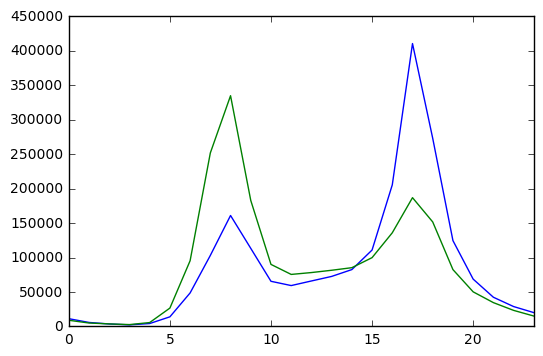

In [104]:
pivoted['East'].sum().plot()
pivoted['West'].sum().plot()

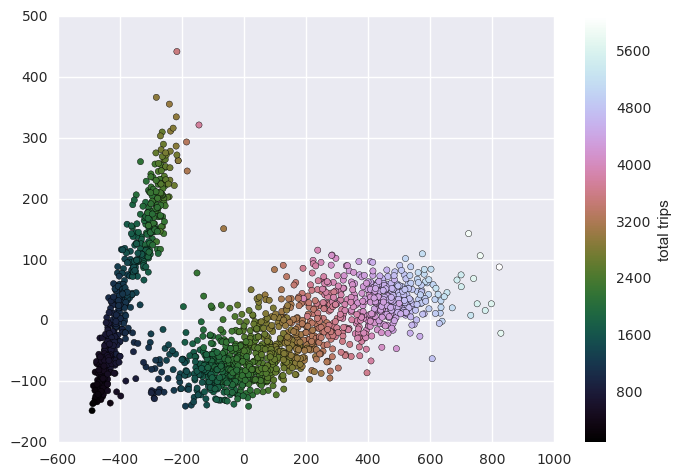

In [113]:
total_trips = pivoted.sum(1)
plt.scatter(xpca[:,0],xpca[:,1],c=total_trips,cmap = 'cubehelix')
plt.colorbar(label = 'total trips')

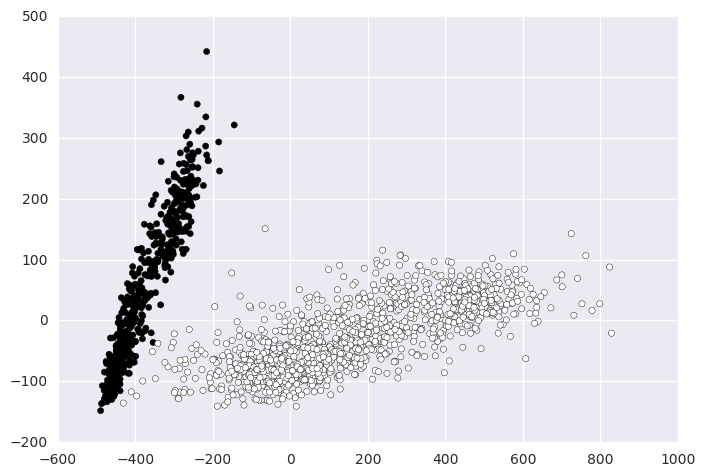

In [112]:
import seaborn
seaborn.set()
from sklearn.mixture import GMM
gmm =GMM(2,covariance_type = 'full',random_state = 0)
gmm.fit(xpca)
cluster_label=gmm.predict(xpca)
plt.scatter(xpca[:,0],xpca[:,1],c=cluster_label)

In [114]:
pivoted["Cluster"] = cluster_label
data_new = data.join(pivoted["Cluster"],on = data.index.date)

In [115]:
data_new_0 = data_new[data_new.Cluster == 0]
data_new_1 = data_new[data_new.Cluster == 1]

In [116]:
by_hour_0 = data_new_0.groupby(data_new_0.index.time).mean()
by_hour_1 = data_new_1.groupby(data_new_1.index.time).mean()

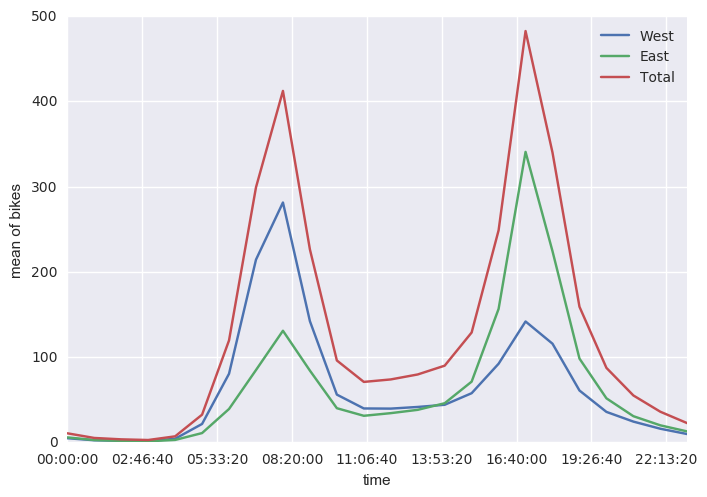

In [118]:
by_hour_0[["West","East","Total"]].plot()
plt.xlabel("time")
plt.ylabel("mean of bikes")

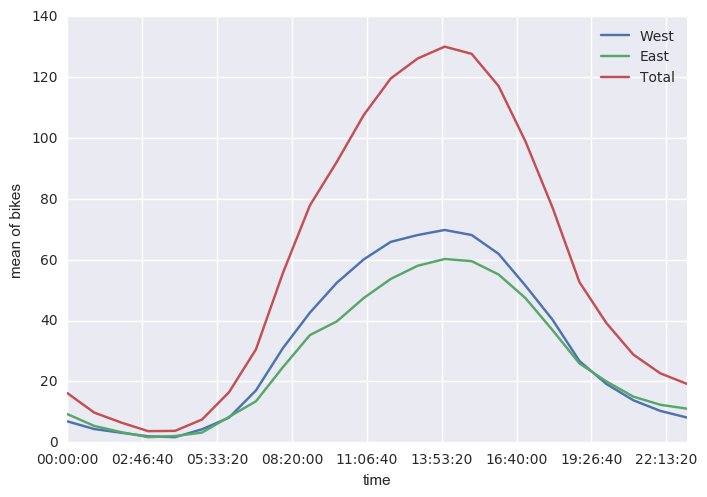

In [119]:
by_hour_1[["West","East","Total"]].plot()
plt.xlabel("time")
plt.ylabel("mean of bikes")

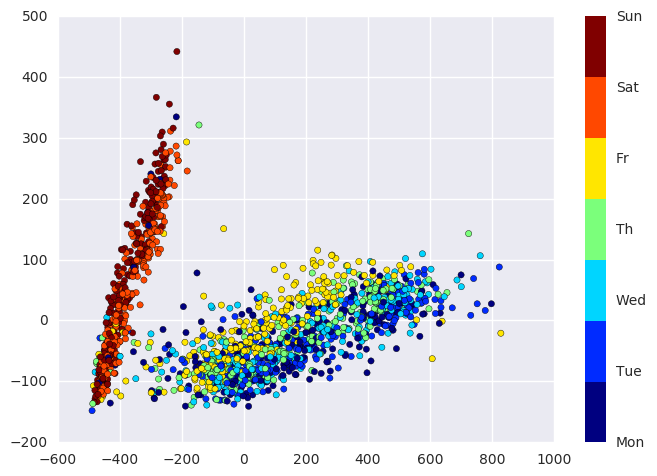

In [125]:
plt.scatter(xpca[:,0],xpca[:,1],c=pd.to_datetime(pivoted.index).dayofweek,cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks = range(7))
cb.set_ticklabels(['Mon','Tue','Wed','Th','Fr','Sat','Sun'])

我们可以得出这样的结论，周六和周末，人们对自行车的使用有着很大的相似，而周一到周五人们对自行车的使用也很相似，结合前面的聚类结果
 但是我们很奇怪的发现一个现象：有一些工作日的人们表现的和周末很相似，这些特别的日子具体是神马日子的，是不是节假日，另外和其他的工作日相比,周五表现的和周末很暧昧不清，这我们需要思考
 另外在工作日的聚类中，我们发现竟然没有一个非工作日的(至少从图中没有发现特例)，结果真是这样吗，我们需要进一步的使用数据进行分析

In [128]:
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']     #分别对应“dayofweek”:[0,1,2,3,4,5,6]
def get_weekday(index):
    return days[index.dayofweek]
data_new_0['weekday'] = data_new_0.index.map(get_weekday)
data_new_0_exception = data_new_0[data_new_0.weekday.isin(["Sat","Sun"])]
#在第一个聚类中，找特例,换句话说，就是找出这样的周六周末，人们对自行车的使用像工作日一样
len(data_new_0_exception)  

 #结果和我们在上图可视化的结果一样，没有一个周六周末，人们使用自行车像工作日一样

/Users/zhangtao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [130]:
data_new_1['weekday'] = data_new_1.index.map(get_weekday)
data_new_1_exception = data_new_1[data_new_1.weekday.isin(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])]#在第2个聚类中，找特例
len(data_new_1_exception)

/Users/zhangtao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


912

In [131]:
date = set(data_new_1_exception.index.date)

In [132]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()

In [134]:
holidays = cal.holidays('2012', '2017', return_name=True)

In [135]:
holidays

2012-01-02                 New Years Day
2012-01-16    Dr. Martin Luther King Jr.
2012-02-20                Presidents Day
2012-05-28                   MemorialDay
2012-07-04                      July 4th
2012-09-03                     Labor Day
2012-10-08                  Columbus Day
2012-11-12                  Veterans Day
2012-11-22                  Thanksgiving
2012-12-25                     Christmas
2013-01-01                 New Years Day
2013-01-21    Dr. Martin Luther King Jr.
2013-02-18                Presidents Day
2013-05-27                   MemorialDay
2013-07-04                      July 4th
2013-09-02                     Labor Day
2013-10-14                  Columbus Day
2013-11-11                  Veterans Day
2013-11-28                  Thanksgiving
2013-12-25                     Christmas
2014-01-01                 New Years Day
2014-01-20    Dr. Martin Luther King Jr.
2014-02-17                Presidents Day
2014-05-26                   MemorialDay
2014-07-04      

Just for completeness, we will add to the list the day before and day after each of these holidays

In [142]:
holidays_all = pd.concat([holidays,"Day Before "+holidays.shift(-1,'D'),"Day After " + holidays.shift(1, 'D')])
holidays_all = holidays_all.sort_index()
holidays_all.ix[(date)]


2013-12-24        Day Before Christmas
2013-11-28                Thanksgiving
2014-09-01                   Labor Day
2015-07-03                    July 4th
2012-11-23      Day After Thanksgiving
2015-11-27      Day After Thanksgiving
2014-11-28      Day After Thanksgiving
2016-11-24                Thanksgiving
2014-05-26                 MemorialDay
2015-01-01               New Years Day
2012-12-24        Day Before Christmas
2014-12-25                   Christmas
2014-11-27                Thanksgiving
2015-11-26                Thanksgiving
2016-09-05                   Labor Day
2015-12-25                   Christmas
2015-12-31    Day Before New Years Day
2016-05-30                 MemorialDay
2013-11-29      Day After Thanksgiving
2013-12-25                   Christmas
2012-11-22                Thanksgiving
2016-11-25      Day After Thanksgiving
2013-05-27                 MemorialDay
2014-01-01               New Years Day
2015-05-25                 MemorialDay
2016-12-26               